# Lista 04 - Teste de Hipótese

In [1]:
#Defina a semente de geração de números aleatórios
#Não gerem mais números aleatórios do que o necessário, ou a correção dará errado
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(2019104)

# Exercício 01:

Em uma determinada universidade, foi realizada uma entrevista em que se desejava coletar respostas de alunos de todas as grandes áreas de conhecimento. Dentre os 1000 entrevistados, cada área teve a seguinte quantidade de alunos:

* Exatas: 100
* Humanas: 600
* Biológicas: 300

No entanto, a qualidade da amostra foi questionada. Argumentou-se que a proporção de alunos de Humanas entrevistados foi muito maior que a proporção de alunos da mesma área na universidade como um todo. Na universidade, há cadastro de:

* 2000 alunos de Exatas
* 8000 alunos de Humanas
* 2500 alunos de Biológicas

A) Retorne uma lista de True ou False de acordo com as afirmativas abaixo:

    1: A respeito da hipótese nula, podemos realizar testes que nos permitam aceitá-la como verdadeira.
    2: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista não foi gerada de forma uniformemente aleatória".
    3: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista foi gerada de forma uniformemente aleatória".
    
Exemplo:

```python
def q1a():
    return [ False, False, False ]
```

In [3]:
def q1a():
    return [True, False, True]

B) Para comparar as distribuições, implemente a métrica de Total Variation Distance.

In [4]:
def tvd(p, q):
    return sum([abs(p[i]-q[i]) for i in range(len(p))])/2.0

In [5]:
from numpy.testing import *
pop = np.array([0.15, 0.18, 0.12, 0.54, 0.01])
samp = np.array([0.26, 0.08, 0.08, 0.54, 0.04])
assert_equal( tvd(pop,samp), 0.14 )

C) Calcule o TVD da amostra utilizada na entrevista

__Dica:__ A Total Variation Distance é uma métrica de distância entre distribuições de probabilidade, não entre quantidades absolutas.

In [6]:
amostra = [100.0/1000.0, 600.0/1000.0, 300.0/1000.0]
populacao = [2000.0/12500.0, 8000.0/12500.0, 2500.0/12500.0]

def q1c():
    return tvd(amostra, populacao)

D) Implemente a função que simule uma amostra uniformemente aleatória, retornando uma lista de proporções para cada categoria (Exatas, Humanas, Biológicas).

Exemplo: 
```python
def gera_amostra(tamanho_amostra):
    return [0.6, 0.0, 0.4]
```
__Dica:__ crie uma lista para a população (indicando a área de conhecimento do estudante por 0,1 ou 2, por exemplo) e use a função ```numpy.random.shuffle``` para embaralhar os dados. Depois, pegue os primeiros elementos da lista para formar a amostra, e calcule as proporções a partir disso.

In [7]:
def gera_amostra(tamanho_amostra):
    pop = [0]*2000 + [1]*8000 + [2]*2500
    np.random.shuffle(pop)
    amost = pop[:tamanho_amostra]
    
    proporcoes = [amost.count(0)/tamanho_amostra, amost.count(1)/tamanho_amostra, amost.count(2)/tamanho_amostra]
    return proporcoes

E) Gere 10000 amostras, e plote o gráfico de distribuição dos valores de TVD. Coloque no gráfico um ponto mostrando o TVD da amostra da entrevista.

Text(0, 0.5, '# Simulações')

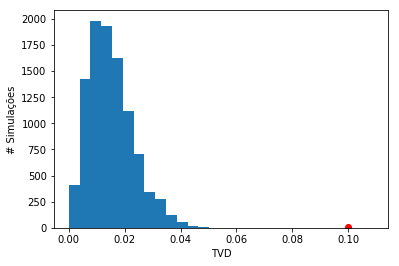

In [8]:
populacao = [2000.0/12500.0, 8000.0/12500.0, 2500.0/12500.0]
N = 10000
tamanhoAmostra = 1000

tvds = []
for _ in range(N):
    proporcaoAmostra = gera_amostra(tamanhoAmostra)
    tvds.append(tvd(proporcaoAmostra, populacao))


plt.scatter(q1c(), 10, color="red", alpha=1)
plt.hist(tvds, bins=15)
plt.xlabel("TVD")
plt.ylabel("# Simulações")

F) Escreva uma função que retorne a partir de qual valor de TVD não estamos mais dentro do intervalo de 90% de confiança

In [9]:
def q1f():
    return np.percentile(tvds, 90.0)

# Exercício 02:

Usando os dados do arquivo ```baby.csv```, vamos realizar um teste por permutação.

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('baby.csv')

# Convertendo para unidades não EUA
df['Birth Weight'] = 0.0283495 * df['Birth Weight']
df['Maternal Pregnancy Weight'] = 0.0283495 * df['Maternal Pregnancy Weight']
df['Maternal Height'] = 0.0254 * df['Maternal Height']

df.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,3.401940,284,27,1.5748,2.834950,False
1,3.203493,282,33,1.6256,3.827183,False
2,3.628736,279,28,1.6256,3.260193,True
3,3.061746,282,23,1.7018,3.543687,True
4,3.855532,286,25,1.5748,2.636503,False


A) Implemente uma função que retorne a diferença entre a média dos pesos dos bebês para as mães fumantes e a média para as mães não fumantes. Exemplo:

```python
def q2a(df):
    media_fumantes = 3.1
    media_nao_fumantes = 3.8
    return -0.7
```

In [12]:
def q2a(df):
    fumantes = df[df['Maternal Smoker'] == True]
    naoFumantes = df[df['Maternal Smoker'] == False]
    return fumantes['Birth Weight'].mean() - naoFumantes['Birth Weight'].mean()

B) Realize permutações com os rótulos (mães fumantes / não fumantes), de tamanhos ```[10,100,500,1000,5000]```. Plote gráficos mostrando a distribuição das diferenças entre as médias de peso dos bebês, conforme se aumenta a quantidade de permutações. Ou seja, um gráfico para 10 permutações, um para 100, e assim por diante.

Como exemplo, a imagem abaixo mostra o gráfico para 100 permutações.

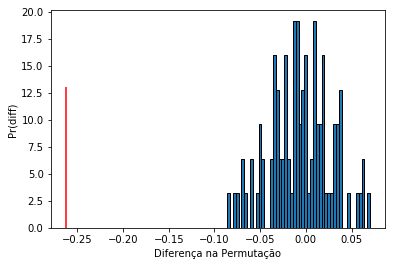

In [13]:
from IPython.display import Image
Image('100permutacoes.png')

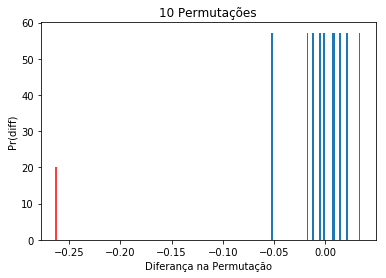

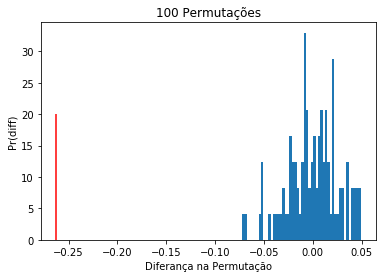

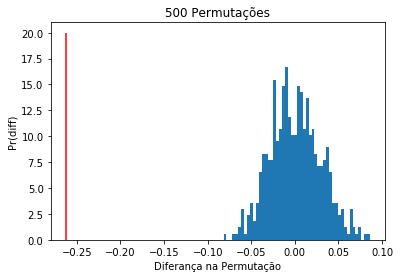

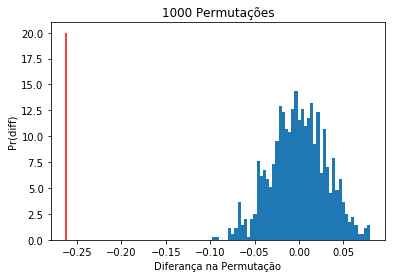

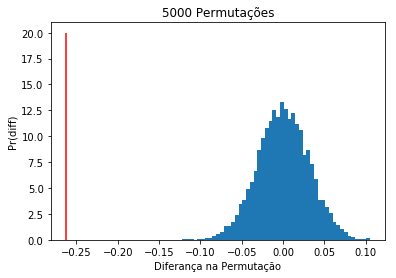

In [14]:
fumantes = df['Maternal Smoker'] == True
diferencaReal = q2a(df)

for tamanhoPermutacao in [10, 100, 500, 1000, 5000]:
    diferencas = []
    for _ in range(tamanhoPermutacao):
        copiaFumantes = fumantes
        np.random.shuffle(copiaFumantes.values)
        diferencas.append(df[copiaFumantes]['Birth Weight'].mean() - df[~copiaFumantes]['Birth Weight'].mean())
    
    # Plota a distribuição das diferenças
    plt.title(str(tamanhoPermutacao) + " Permutações")
    plt.xlabel("Diferança na Permutação")
    plt.ylabel("Pr(diff)")
    plt.vlines(diferencaReal, ymin=0.0, ymax=20, color="red")
    plt.hist(diferencas, density=True, bins=50)
    plt.show()

B) Escreva abaixo o que você observou com os gráficos.

Seguindo o Teorema Central do Limite, conforme aumentamos a quantidade de permutações, a distribuição da diferença das médias mais se parece com uma distribuição normal. 

Em todos os gráficos podemos perceber que a diferença real entre mães fumantes e não fumantes é um outlier (com significância >= 99%), e isto faz com que possamos rejeitar a hipótese nula de que essa diferença é fruto do acaso.